In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def split_command(cmd: str) -> tuple[str, str, str, str]:
    (
        tool,
        thread,
        files,
        comp,
    ) = cmd.split("-")
    return (tool, thread, files, comp)


timings = pd.read_csv("./benchmark.csv")
timings[["tool", "thread", "files", "comp"]] = timings.command.str.split(
    "-", expand=True
)
timings["tool"] = timings.tool.apply(
    lambda x: x.replace("fasterq", "fasterq-dump").replace("fastq", "fastq-dump")
)
timings["files"] = timings.apply(
    lambda x: "vbq"
    if "vbq" in x["command"]
    else "bq"
    if "bq" in x["command"]
    else x["files"],
    axis=1,
)
timings

,command,mean,stddev,median,user,system,min,max,tool,thread,files,comp
0,xsra-st-stdout-uncompressed,27.238647,0.351999,27.238647,25.780072,1.479345,26.989746,27.487548,xsra,st,stdout,uncompressed
1,xsra-st-stdout-gzip,70.131689,1.166632,70.131689,88.500798,2.748510,69.306755,70.956622,xsra,st,stdout,gzip
2,xsra-st-stdout-bgzip,70.332014,0.259693,70.332014,84.477567,2.632966,70.148384,70.515645,xsra,st,stdout,bgzip
3,xsra-st-stdout-zstd,30.063858,0.023759,30.063858,55.622973,1.636697,30.047058,30.080658,xsra,st,stdout,zstd
4,xsra-mt-stdout-uncompressed,3.770700,0.016602,3.770700,36.136383,2.155187,3.758960,3.782440,xsra,mt,stdout,uncompressed
5,xsra-mt-stdout-gzip,12.252687,0.019752,12.252687,121.584398,3.664261,12.238720,12.266653,xsra,mt,stdout,gzip
6,xsra-mt-stdout-bgzip,12.270740,0.074428,12.270740,119.330361,4.145390,12.218112,12.323369,xsra,mt,stdout,bgzip
7,xsra-mt-stdout-zstd,8.213411,0.049617,8.213411,82.558874,2.607229,8.178326,8.248496,xsra,mt,stdout,zstd
8,xsra-st-split-uncompressed,28.407487,0.018799,28.407487,25.563678,2.574521,28.394195,28.420780,xsra,st,split,uncompressed
9,xsra-st-recode-bq,25.156976,0.189412,25.156976,23.581842,1.570880,25.023042,25.290911,xsra,st,bq,bq


In [3]:
import os

filepath = "/Users/noam.teyssier/data/sra/SRR27592687/SRR27592687.sra"

# get fs in MB
filesize = os.path.getsize(filepath) / 1024 / 1024
timings["throughput"] = filesize / timings["mean"]
timings

,command,mean,stddev,median,user,system,min,max,tool,thread,files,comp,throughput
0,xsra-st-stdout-uncompressed,27.238647,0.351999,27.238647,25.780072,1.479345,26.989746,27.487548,xsra,st,stdout,uncompressed,74.917410
1,xsra-st-stdout-gzip,70.131689,1.166632,70.131689,88.500798,2.748510,69.306755,70.956622,xsra,st,stdout,gzip,29.097387
2,xsra-st-stdout-bgzip,70.332014,0.259693,70.332014,84.477567,2.632966,70.148384,70.515645,xsra,st,stdout,bgzip,29.014509
3,xsra-st-stdout-zstd,30.063858,0.023759,30.063858,55.622973,1.636697,30.047058,30.080658,xsra,st,stdout,zstd,67.877146
4,xsra-mt-stdout-uncompressed,3.770700,0.016602,3.770700,36.136383,2.155187,3.758960,3.782440,xsra,mt,stdout,uncompressed,541.185687
5,xsra-mt-stdout-gzip,12.252687,0.019752,12.252687,121.584398,3.664261,12.238720,12.266653,xsra,mt,stdout,gzip,166.547054
6,xsra-mt-stdout-bgzip,12.270740,0.074428,12.270740,119.330361,4.145390,12.218112,12.323369,xsra,mt,stdout,bgzip,166.302015
7,xsra-mt-stdout-zstd,8.213411,0.049617,8.213411,82.558874,2.607229,8.178326,8.248496,xsra,mt,stdout,zstd,248.453271
8,xsra-st-split-uncompressed,28.407487,0.018799,28.407487,25.563678,2.574521,28.394195,28.420780,xsra,st,split,uncompressed,71.834895
9,xsra-st-recode-bq,25.156976,0.189412,25.156976,23.581842,1.570880,25.023042,25.290911,xsra,st,bq,bq,81.116618


In [4]:
timings["format"] = timings.command.apply(
    lambda x: "fastq" if "bq" not in x else "binseq"
)
timings["tool-format"] = timings["tool"] + "::" + timings["format"]
timings

,command,mean,stddev,median,user,system,min,max,tool,thread,files,comp,throughput,format,tool-format
0,xsra-st-stdout-uncompressed,27.238647,0.351999,27.238647,25.780072,1.479345,26.989746,27.487548,xsra,st,stdout,uncompressed,74.917410,fastq,xsra::fastq
1,xsra-st-stdout-gzip,70.131689,1.166632,70.131689,88.500798,2.748510,69.306755,70.956622,xsra,st,stdout,gzip,29.097387,fastq,xsra::fastq
2,xsra-st-stdout-bgzip,70.332014,0.259693,70.332014,84.477567,2.632966,70.148384,70.515645,xsra,st,stdout,bgzip,29.014509,fastq,xsra::fastq
3,xsra-st-stdout-zstd,30.063858,0.023759,30.063858,55.622973,1.636697,30.047058,30.080658,xsra,st,stdout,zstd,67.877146,fastq,xsra::fastq
4,xsra-mt-stdout-uncompressed,3.770700,0.016602,3.770700,36.136383,2.155187,3.758960,3.782440,xsra,mt,stdout,uncompressed,541.185687,fastq,xsra::fastq
5,xsra-mt-stdout-gzip,12.252687,0.019752,12.252687,121.584398,3.664261,12.238720,12.266653,xsra,mt,stdout,gzip,166.547054,fastq,xsra::fastq
6,xsra-mt-stdout-bgzip,12.270740,0.074428,12.270740,119.330361,4.145390,12.218112,12.323369,xsra,mt,stdout,bgzip,166.302015,fastq,xsra::fastq
7,xsra-mt-stdout-zstd,8.213411,0.049617,8.213411,82.558874,2.607229,8.178326,8.248496,xsra,mt,stdout,zstd,248.453271,fastq,xsra::fastq
8,xsra-st-split-uncompressed,28.407487,0.018799,28.407487,25.563678,2.574521,28.394195,28.420780,xsra,st,split,uncompressed,71.834895,fastq,xsra::fastq
9,xsra-st-recode-bq,25.156976,0.189412,25.156976,23.581842,1.570880,25.023042,25.290911,xsra,st,bq,bq,81.116618,binseq,xsra::binseq


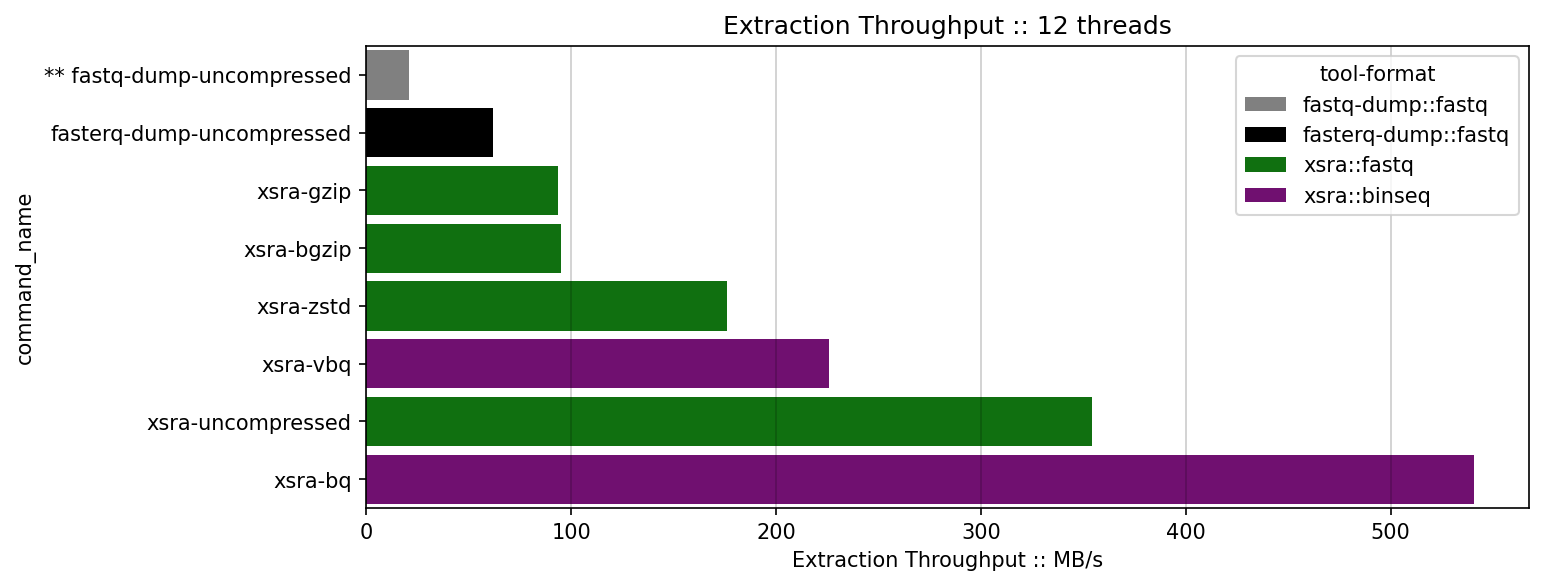

In [5]:
rename = {
    "fasterq-mt-split-uncompressed": "fasterq-dump-uncompressed",
    "fastq-st-split-uncompressed": "** fastq-dump-uncompressed",
    "xsra-mt-split-gzip": "xsra-gzip",
    "xsra-mt-split-bgzip": "xsra-bgzip",
    "xsra-mt-split-zstd": "xsra-zstd",
    "xsra-mt-split-uncompressed": "xsra-uncompressed",
    "xsra-mt-recode-vbq": "xsra-vbq",
    "xsra-mt-recode-bq": "xsra-bq",
}

timings["command_name"] = timings["command"].map(rename)
plt.figure(figsize=(10, 4), dpi=150)
sns.barplot(
    data=timings[
        (timings["files"] != "stdout")
        & (~timings["command"].str.contains("xsra-st"))
        & (~timings["command"].str.contains("fasterq-st"))
    ].sort_values(by=["throughput"]),
    x="throughput",
    y="command_name",
    hue="tool-format",
    width=0.85,
    palette={
        "fastq-dump::fastq": "grey",
        "fasterq-dump::fastq": "black",
        "xsra::fastq": "green",
        "xsra::binseq": "purple",
    },
)
plt.xlabel("Extraction Throughput :: MB/s")
plt.title("Extraction Throughput :: 12 threads")
plt.grid(axis="x", color="black", alpha=0.2)
# plt.xscale("log")
# plt.xticks(rotation=90)
plt.savefig("./xsra-benchmark-runtime.svg")
plt.show()

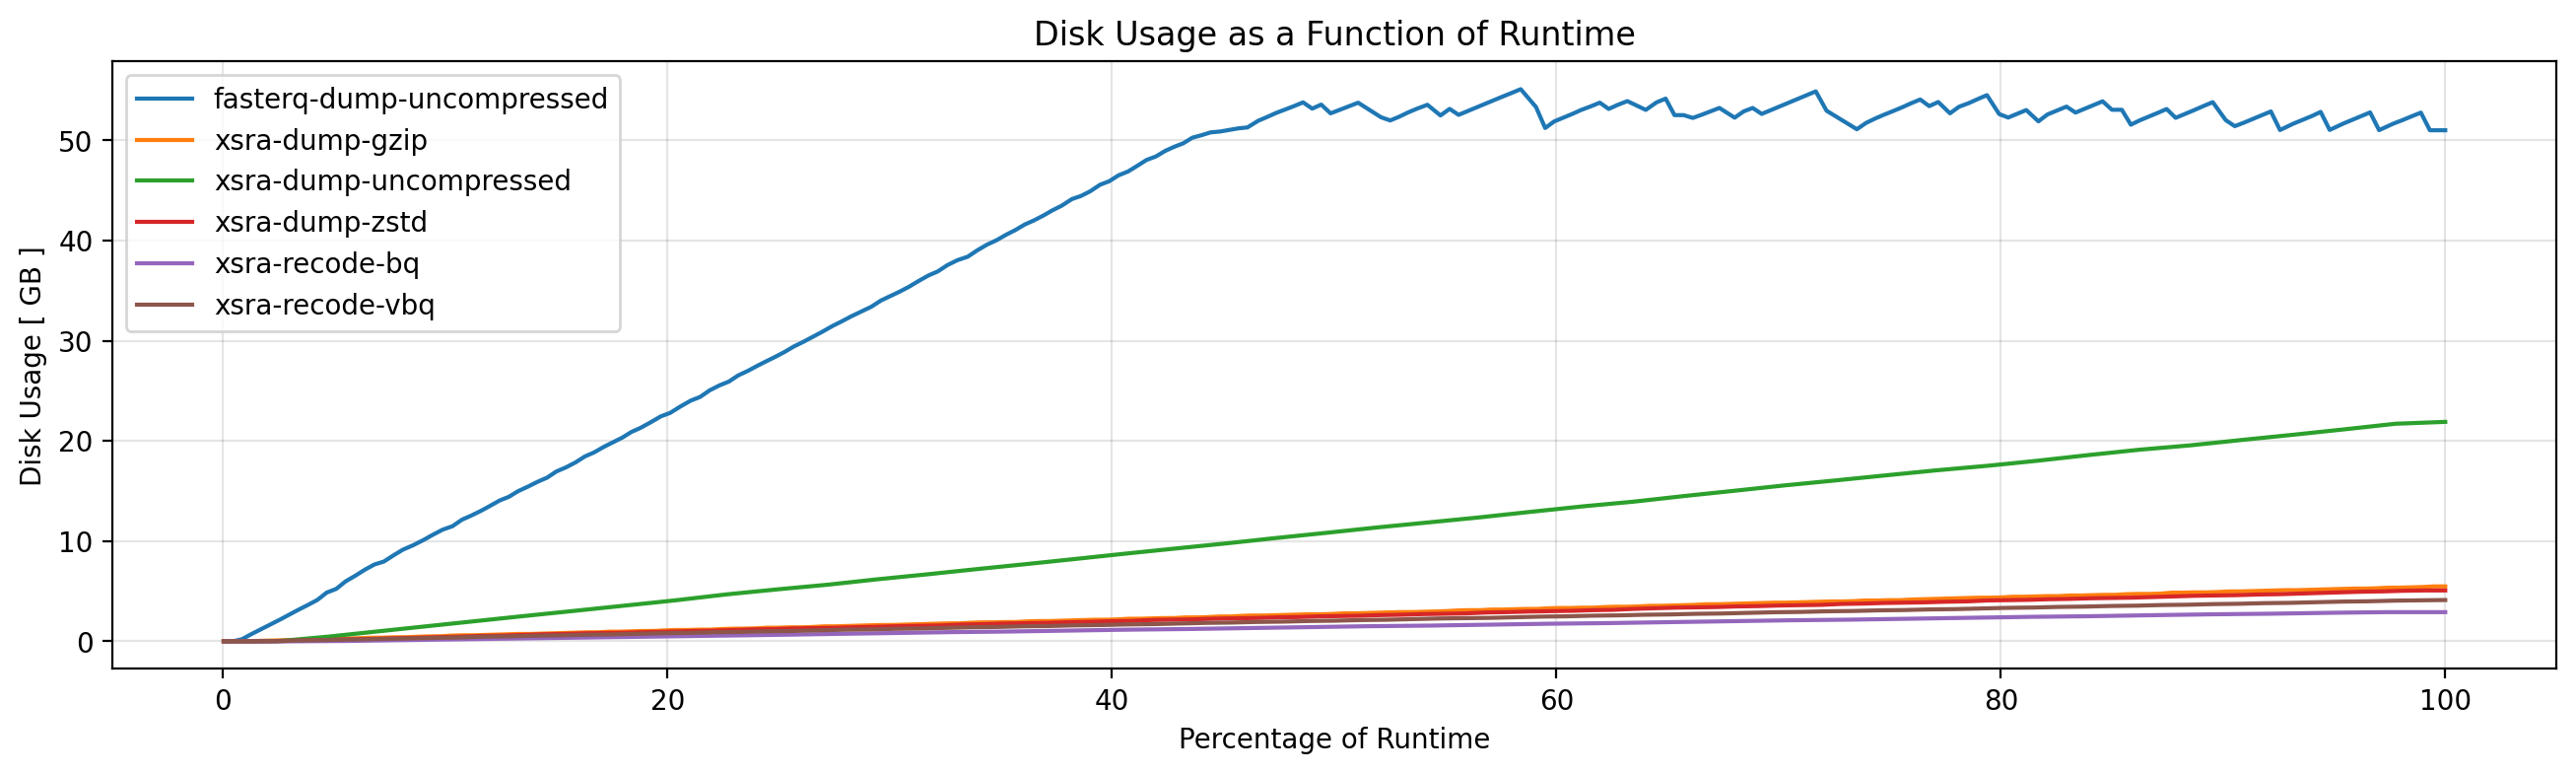

In [6]:
from glob import glob

dirio = []
for file in glob("./dirio_logs/*.log.tsv"):
    tool = file.split("/")[-1].split(".log.tsv")[0]
    frame = pd.read_csv(file, sep="\t")
    frame["tool"] = tool
    dirio.append(frame)

dirio = pd.concat(dirio)
totals = dirio.groupby("tool").elapsed.max().reset_index(name="total_elapsed")
dirio = dirio.merge(totals)
dirio["pc_runtime"] = dirio["elapsed"] / dirio["total_elapsed"] * 100
dirio["peak_gb"] = dirio["peak"] / (1024**2)
dirio["usage_gb"] = dirio["disk_usage"] / (1024**2)


plt.figure(figsize=(16, 4), dpi=200)
sns.lineplot(
    data=dirio.sort_values("tool"),
    x="pc_runtime",
    y="usage_gb",
    hue="tool",
)
plt.ylabel("Disk Usage [ GB ]")
plt.xlabel("Percentage of Runtime")
plt.grid(which="both", axis="both", color="black", alpha=0.1)
plt.title("Disk Usage as a Function of Runtime")
plt.legend(loc="upper left")
plt.savefig("./xsra-benchmark-disk.svg")
plt.show()